### Overall Workflow
1. Import data and go over the columns
2. Data preprocessing (null value handling, converting to datetime, building new features, etc)
3. Feature selection (categorical and numerical)
4. Scaling (for numerical features) and one-hot encoding (for categorical features)
5. Check if data is imbalanced (for classification task). Use class_weight='balanced' if not.
5. Train test split (stratify for label)
6. Build model, train, evaluate and plotting.

In [16]:
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score, precision_recall_curve)

### Scaling

In [11]:
# scaler, important for models using gradient descent
# features with larger values will have larger gradient when calculating derivatives
# this will be unfair to the features with smaller values

# IMPORTANT: only fit_transform() once to get the mean, std, etc from training dataset
# then apply the SAME stats to the eval and test set using transform() method
# otherwise the eval and test set will be scaled using their own std, mean, etc
# which will lead to leakage

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numerical_cols = []
# X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
# X_eval[numerical_cols] = scaler.transform(X_eval[numerical_cols])
# X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

### One Hot Encoding

In [3]:
# load data
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('titanic.csv')

In [5]:
# for old version, use sparse=False
# for drop='first' if want to reduce redundency
# use drop='if_binary' to drop only for binary col
encoder = OneHotEncoder(sparse_output=False, drop='if_binary')

In [10]:
# get the transformed array
categorical_cols = ['Sex', 'Pclass']
encoded_array = encoder.fit_transform(df[categorical_cols])

# get the new names
feature_names = encoder.get_feature_names_out(categorical_cols)

# add the new arrays in a new dataframe
df_encoded = pd.DataFrame(encoded_array, columns=feature_names, index=df.index)

# concat with original dataframe
df_final = pd.concat([df.drop(categorical_cols, axis=1), df_encoded], axis=1)
df_final.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1.0,0.0,0.0,1.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0.0,1.0,0.0,0.0
2,3,1,"Heikkinen, Miss Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.0,0.0,0.0,1.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0.0,1.0,0.0,0.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1.0,0.0,0.0,1.0


### Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing

In [4]:
data = fetch_california_housing()

# X is a dataframe, y is a Series
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseValue')
X.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")


Training set: 16512 samples
Test set: 4128 samples


In [7]:
# build model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [9]:
# evaluate
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

print("\nTraining Set Performance:")
print(f"  RMSE: {train_rmse:.4f}")
print(f"  MAE:  {train_mae:.4f}")
print(f"  R²:   {train_r2:.4f}")

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nTest Set Performance:")
print(f"  RMSE: {test_rmse:.4f}")
print(f"  MAE:  {test_mae:.4f}")
print(f"  R²:   {test_r2:.4f}")


Training Set Performance:
  RMSE: 0.7197
  MAE:  0.5286
  R²:   0.6126

Test Set Performance:
  RMSE: 0.7456
  MAE:  0.5332
  R²:   0.5758


In [12]:
# coefficient
print(f"Intercept: {model.intercept_:.4f}")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

Intercept: -37.0233
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


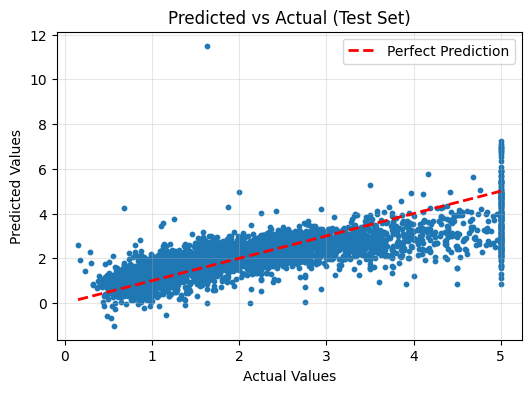

In [16]:
# plot
fig, axe = plt.subplots(figsize=(6, 4))
axe.scatter(y_test, y_test_pred, s=10)
axe.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axe.set_xlabel('Actual Values')
axe.set_ylabel('Predicted Values')
axe.set_title('Predicted vs Actual (Test Set)')
axe.legend()
axe.grid(True, alpha=0.3)
plt.show()

### Logistic Regression

In [29]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                            f1_score, confusion_matrix, classification_report,
                            roc_curve, roc_auc_score, precision_recall_curve)

In [19]:
# load data
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='target')
X.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [20]:
# train test split
# stratify ensures the percentage of labels are the same in training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# build model
model = LogisticRegression(max_iter=10000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [25]:
# predict (just boolean labels)
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# get probability predictions (better for roc-auc)
y_train_proba = model.predict_proba(X_train_scaled)[:, 1]
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

In [30]:
# eval
print("\nTraining Set Performance:")
print(f"  Accuracy:  {accuracy_score(y_train, y_train_pred):.4f}")
print(f"  Precision: {precision_score(y_train, y_train_pred):.4f}")
print(f"  Recall:    {recall_score(y_train, y_train_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_train, y_train_pred):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_train, y_train_proba):.4f}")

print("\nTest Set Performance:")
print(f"  Accuracy:  {accuracy_score(y_test, y_test_pred):.4f}")
print(f"  Precision: {precision_score(y_test, y_test_pred):.4f}")
print(f"  Recall:    {recall_score(y_test, y_test_pred):.4f}")
print(f"  F1-Score:  {f1_score(y_test, y_test_pred):.4f}")
print(f"  ROC-AUC:   {roc_auc_score(y_test, y_test_proba):.4f}")


Training Set Performance:
  Accuracy:  0.9890
  Precision: 0.9861
  Recall:    0.9965
  F1-Score:  0.9913
  ROC-AUC:   0.9975

Test Set Performance:
  Accuracy:  0.9825
  Precision: 0.9861
  Recall:    0.9861
  F1-Score:  0.9861
  ROC-AUC:   0.9954


In [31]:
# or generate a report
print(classification_report(y_test, y_test_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [33]:
# confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print(f"\nTrue Negatives:  {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives:  {cm[1,1]}")

[[41  1]
 [ 1 71]]

True Negatives:  41
False Positives: 1
False Negatives: 1
True Positives:  71


In [38]:
# feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
feature_importance['Abs_Coefficient'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False)
feature_importance[['Feature', 'Abs_Coefficient']].head(5)

,Feature,Abs_Coefficient
21,worst texture,1.248332
10,radius error,1.084279
23,worst area,0.953706
27,worst concave points,0.948458
20,worst radius,0.945125


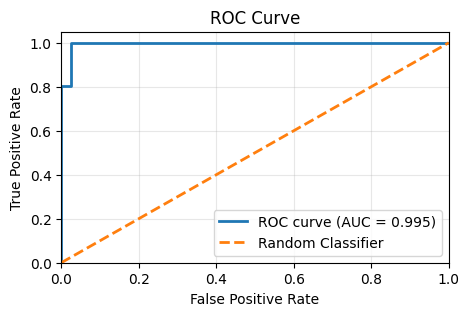

In [46]:
# roc curve
fig, axe = plt.subplots(figsize=(5, 3))
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = roc_auc_score(y_test, y_test_proba)
axe.plot(fpr, tpr, lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
axe.plot([0, 1], [0, 1], lw=2, linestyle='--', label='Random Classifier')
axe.set_xlim([0.0, 1.0])
axe.set_ylim([0.0, 1.05])
axe.set_xlabel('False Positive Rate')
axe.set_ylabel('True Positive Rate')
axe.set_title('ROC Curve')
axe.legend(loc="lower right")
axe.grid(True, alpha=0.3)

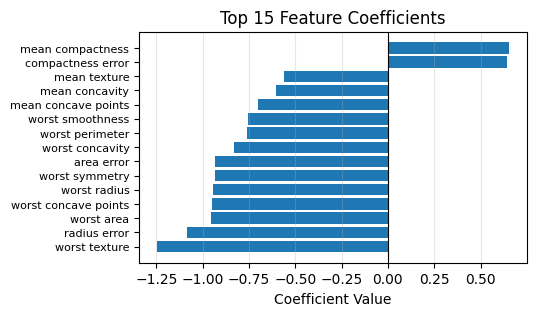

In [47]:
fig, axe = plt.subplots(figsize=(5, 3))
top_features = feature_importance.head(15).sort_values('Coefficient')
axe.barh(range(len(top_features)), top_features['Coefficient'])
axe.set_yticks(range(len(top_features)))
axe.set_yticklabels(top_features['Feature'], fontsize=8)
axe.set_xlabel('Coefficient Value')
axe.set_title('Top 15 Feature Coefficients')
axe.axvline(x=0, color='black', linestyle='-', lw=0.8)
axe.grid(True, alpha=0.3, axis='x')

### Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn import datasets

In [51]:
# load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
X[:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [53]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [56]:
# train model
clf = DecisionTreeClassifier(criterion='gini', max_depth=3, min_samples_split=2, min_samples_leaf=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [57]:
# prediction
y_pred = clf.predict(X_test)

In [60]:
# evaluation
print("\n--- Classification Results ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"\nFeature Importances:")
for i, importance in enumerate(clf.feature_importances_):
    print(f"  {iris.feature_names[i]}: {importance:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


--- Classification Results ---
Accuracy: 0.9778

Feature Importances:
  sepal length (cm): 0.0000
  sepal width (cm): 0.0000
  petal length (cm): 0.9637
  petal width (cm): 0.0363

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.93      0.97        15
   virginica       0.94      1.00      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


### Decision Tree Regressor

In [65]:
# load data
from sklearn.tree import DecisionTreeRegressor
data = fetch_california_housing()

# X is a dataframe, y is a Series
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='MedHouseValue')
X.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22


In [68]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
results = []

for depth in [3, 5, 10]:
    reg = DecisionTreeRegressor(max_depth=depth, min_samples_split=20, min_samples_leaf=10)
    reg.fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    results.append({
    'depth': depth,
    'train_mse': train_mse,
    'test_mse': test_mse,
    'train_r2': train_r2,
    'test_r2': test_r2,
    'model': reg
    })
    
print(results)

[{'depth': 3, 'train_mse': 0.6177279002328598, 'test_mse': 0.642410981026564, 'train_r2': 0.5378979887726012, 'test_r2': 0.5097629887358219, 'model': DecisionTreeRegressor(max_depth=3, min_samples_leaf=10, min_samples_split=20)}, {'depth': 5, 'train_mse': 0.4843432765009063, 'test_mse': 0.5245146178314735, 'train_r2': 0.6376786573648903, 'test_r2': 0.5997321244428706, 'model': DecisionTreeRegressor(max_depth=5, min_samples_leaf=10, min_samples_split=20)}, {'depth': 10, 'train_mse': 0.2606823551861177, 'test_mse': 0.3784702147914353, 'train_r2': 0.8049920675792843, 'test_r2': 0.7111816073639119, 'model': DecisionTreeRegressor(max_depth=10, min_samples_leaf=10, min_samples_split=20)}]


In [70]:
# best model is step=10
best_model = results[2]['model']
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nTest Set Performance:")
print(f"  Mean Squared Error (MSE):  {mse:.4f}")
print(f"  Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"  Mean Absolute Error (MAE): {mae:.4f}")
print(f"  R² Score: {r2:.4f}")


Test Set Performance:
  Mean Squared Error (MSE):  0.3785
  Root Mean Squared Error (RMSE): 0.6152
  Mean Absolute Error (MAE): 0.4197
  R² Score: 0.7112


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
rf_classifier = RandomForestClassifier(
    n_estimators=100,      # Number of trees
    max_depth=5,           # Maximum depth of each tree
    random_state=42        # For reproducibility
)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

In [26]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9333

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.90      0.90      0.90        10
   virginica       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


In [28]:
# feature importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': rf_classifier.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance

,feature,importance
3,petal width (cm),0.438141
2,petal length (cm),0.431641
0,sepal length (cm),0.115972
1,sepal width (cm),0.014246


### Gradient Boost

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
gb_classifier = GradientBoostingClassifier(
    n_estimators=100,          # Number of boosting stages (trees)
    learning_rate=0.1,         # Shrinkage parameter
    max_depth=3,               # Maximum depth of individual trees
    min_samples_split=2,       # Minimum samples required to split a node
    min_samples_leaf=1,        # Minimum samples required at leaf node
    subsample=0.8,             # Fraction of samples for fitting each tree
    random_state=42
)
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42, subsample=0.8)

In [31]:
# make predications
y_pred = gb_classifier.predict(X_test)
y_pred_proba = gb_classifier.predict_proba(X_test)

In [32]:
# evaluate
print(f"\nAccuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 0.9000

Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



In [33]:
# feature importance
feature_importance = pd.DataFrame({
    'feature': iris.feature_names,
    'importance': gb_classifier.feature_importances_
}).sort_values('importance', ascending=False)
feature_importance

,feature,importance
3,petal width (cm),0.516630
2,petal length (cm),0.440611
1,sepal width (cm),0.025877
0,sepal length (cm),0.016882
